In [1]:
# Импорт библиотек
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

%matplotlib inline

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [4]:
df.head(10)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


1.Построить гистограмму количества звонков в техническую поддержку

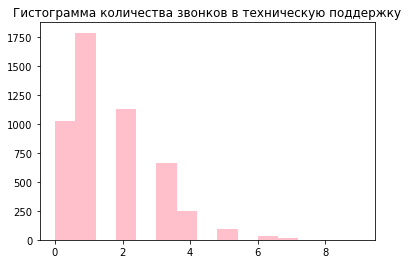

In [5]:
plt.hist(df['number_customer_service_calls'], 15, facecolor='pink')
plt.title('Гистограмма количества звонков в техническую поддержку')
plt.show()

2.Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

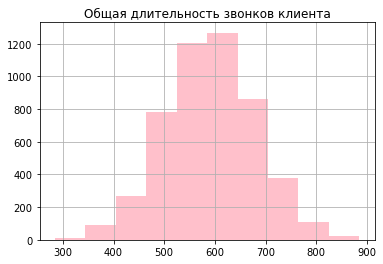

In [6]:
df['total_min'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
plt.hist(df['total_min'], facecolor='pink')
plt.title('Общая длительность звонков клиента')
plt.grid(True)
plt.show()


3.Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [7]:
x = df['total_min']
y = df['number_customer_service_calls']
n = len(x)
sum_x = float(sum(x))
sum_y = float(sum(y))
sum_x_sq = sum(xi*xi for xi in x)
sum_y_sq = sum(yi*yi for yi in y)
psum = sum(xi*yi for xi, yi in zip(x, y))
num = psum - (sum_x * sum_y/n)
den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
if den == 0: print(0)
print(num/den)

-0.011407910827491027


Проверим вычисления с помощью встроенной функции:

Коэффициент корреляции Пирсона: -0.011407910827441406


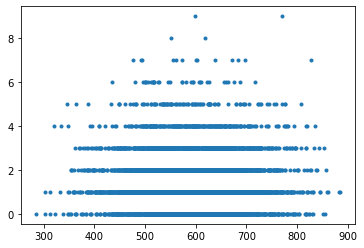

In [8]:
from scipy.stats import pearsonr
x = df['total_min']
y = df['number_customer_service_calls']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

4.Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

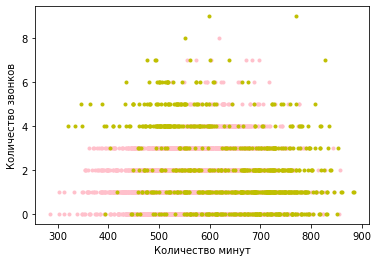

In [9]:
#нет оттока
plt.scatter(df[df['churned']==False]['total_min'], df[df['churned']==False]['number_customer_service_calls'], marker='.',color='pink')
#потеря клиента
plt.scatter(df[df['churned']==True]['total_min'], df[df['churned']==True]['number_customer_service_calls'], marker='.', color='y')
plt.xlabel('Количество минут')
plt.ylabel('Количество звонков')
plt.show()

5.Вывести top-5 самых много и самых мало говорящих клиентов

In [10]:
data=df.sort_values(by='total_min', ascending=False)
print('\ntop-5 самых многоговорящих: \n',data.phone_number.values[:5],
     '\ntop-5 самых малоговорящих клиентов: \n',data.phone_number.values[-5:])


top-5 самых многоговорящих: 
 ['345-9140' '352-6976' '345-3787' '410-3888' '370-4667'] 
top-5 самых малоговорящих клиентов: 
 ['375-8934' '405-9233' '362-8044' '380-5246' '331-3174']


6.Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [12]:
states = list(set(df.state))
for state in states:
    print(state+':\nДоля оттока: ',df[ (df.churned == True) & (df.state == state)].count().values[0]/df[df.state == state].count().values[0]*100,'%',
          '\nСредняя стоимость минуты(дневное временя):',sum(df[ (df.state == state)].total_day_minutes/df[ (df.state == state)].total_day_charge)/df[df.state == state].count().values[0],'\n')

IL:
Доля оттока:  7.954545454545454 % 
Средняя стоимость минуты(дневное временя): 5.882222520461389 

KY:
Доля оттока:  15.151515151515152 % 
Средняя стоимость минуты(дневное временя): 5.882075868201109 

VA:
Доля оттока:  5.084745762711865 % 
Средняя стоимость минуты(дневное временя): 5.882253352425479 

KS:
Доля оттока:  18.181818181818183 % 
Средняя стоимость минуты(дневное временя): 5.882256614740531 

NM:
Доля оттока:  10.989010989010989 % 
Средняя стоимость минуты(дневное временя): 5.88229867912705 

FL:
Доля оттока:  13.333333333333334 % 
Средняя стоимость минуты(дневное временя): 5.882308448889017 

LA:
Доля оттока:  8.536585365853659 % 
Средняя стоимость минуты(дневное временя): 5.882206026279146 

WY:
Доля оттока:  9.565217391304348 % 
Средняя стоимость минуты(дневное временя): 5.882239936593007 

IN:
Доля оттока:  14.285714285714285 % 
Средняя стоимость минуты(дневное временя): 5.882368730324359 

VT:
Доля оттока:  9.900990099009901 % 
Средняя стоимость минуты(дневное времен

 7.Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [13]:
pd.get_dummies(df['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


8.Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [14]:
data=df
data=data.drop (columns = ['voice_mail_plan','area_code','total_min','phone_number','international_plan'])
data.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
data = pd.get_dummies(data, ['state'])
data.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 's

In [17]:
X, y = data[['account_length', 'total_day_minutes', 'total_eve_minutes',
             'total_night_minutes', 'number_customer_service_calls', 'total_intl_minutes',
            'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY']], data['churned']# Cфрормировали признаки и целевую переменную

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# выполнили разделение данных на данные для обучения и проверки

In [19]:
X_train.head()

,account_length,total_day_minutes,total_eve_minutes,total_night_minutes,number_customer_service_calls,total_intl_minutes,state_AK,state_AL,state_AR,state_AZ,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
2522,106,119.2,228.4,197.9,2,8.4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
583,165,150.5,193.1,311.6,1,10.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1621,138,19.5,140.9,179.7,0,7.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2890,138,240.8,144.5,125.7,0,11.6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1255,90,76.1,290.3,236.9,0,10.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


9.Привести данные к одному масштабу при помощи StandardScaler в случае Pandas (в случае спарка - не надо)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

10.Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [21]:
logistic = LogisticRegression()

In [22]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [23]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
svc_model=SVC()
svc_model.fit(X_train, y_train)

SVC()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
accuracy_score(y_test, logistic.predict(X_test))

0.871

In [27]:
precision_score(y_test, logistic.predict(X_test))

0.5135135135135135

In [28]:
recall_score(y_test, logistic.predict(X_test))

0.14615384615384616

In [29]:
f1_score(y_test, logistic.predict(X_test))

0.22754491017964074

In [30]:
accuracy_score(y_test, tree.predict(X_test))

0.87

In [31]:
precision_score(y_test, tree.predict(X_test))

0.5

In [32]:
recall_score(y_test, tree.predict(X_test))

0.5230769230769231

In [33]:
f1_score(y_test, tree.predict(X_test))

0.5112781954887219

In [34]:
accuracy_score(y_test, svc_model.predict(X_test))

0.871

In [35]:
precision_score(y_test, svc_model.predict(X_test))

1.0

In [36]:
recall_score(y_test, svc_model.predict(X_test))

0.007692307692307693

In [37]:
f1_score(y_test, svc_model.predict(X_test))

0.015267175572519085